In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

First we load the speeches of years 2019 and 2020, as we do visulalization for those years only.

In [2]:
speeches_2019 = pd.read_feather('speeches_2019.feather')
speeches_2020 = pd.read_feather('speeches_2020.feather')

Then, we used the similar keywords and then group them as below:

In [3]:
# Dependent Keywords (Technology Related)
technologie = ['Innovation', 'Information', 'IT', 'Technik', 'Technologie']
datenschutz = ['Datenschutz', 'Datensicherheit', 'Transparenz', 'Anonymität', 'Privatsphäre']
digitalisierung = ['Digitalisierung', 'Automatisierung', 'App ', 'Vernetzung', 'Internet',
                   'Telekommunikation', 'Software', 'Hardware', 'Computer', 'Handy']

# Independent Keywords (Aging Related)
senioren = ['Senioren', 'Erwachsene', 'ältere Menschen', 'Familienmitglieder']
rente = ['Rente', 'Rentner', 'Rentnerin', 'Altersvorsorge', 'Elterngeld']
pflegeheim = ['Pflegeheim', 'Altenheim', 'Pfleger', 'Altenpflege', 'Pflege']

# Independent Keywords (Health Related)
gesundheit = ['Gesundheitswesen', 'Ernährung', 'Lebensqualität', 'Lebenserwartung', 'Gesundheit']
krankheit = ['Erkrankung', 'Nebenwirkung', 'Infektion', 'Krank', 'Krankheit']
medikament = ['Medikament', 'Arzneimittel', 'Patient', 'Behandlung', 'Pill', 'Antibiotika', 'Impfstoffe']
krankenhaus = ['Krankenhaus', 'Klinik', 'Krankenschwester', 'Krankenpfleger', 'Arzt']

We add all the independent keywords to filter the speeches containing them.

In [4]:
independent_keywords = senioren + rente + pflegeheim + gesundheit + krankenhaus + krankheit + medikament

We perform the filtering for year 2019.

In [5]:
speeches_2019_new = speeches_2019[speeches_2019.speechContent.str.contains('|'.join(independent_keywords))]

In [6]:
speeches_2019_new.shape

(1755, 12)

Similarly, we perform the filtering for year 2020 as well.

In [7]:
speeches_2020_new = speeches_2020[speeches_2020.speechContent.str.contains('|'.join(independent_keywords))]
speeches_2020_new.shape

(2469, 12)

Then we two dictonaries each for independent and dependent keywords, as we employ the counting logic seperately for them.

In [8]:
keywords_independent = {
    'Senioren': senioren,
    'Pflegeheim': pflegeheim,
    'Rente': rente,
    'Gesundheit': gesundheit,
    'Krankheit': krankheit,
    'Krankenhaus': krankenhaus,
    'Medikament': medikament,
}
keywords_dependent = {
    'Technologie': technologie,
    'Digitalisierung': digitalisierung,
    'Datenschutz': datenschutz,
}

Then, we count how many speeches contain each of our keywords for visualization purpose, note that for dependent keywords we count on the filtered speeches on independent keywords only.

In [14]:
keywords_count = []
for keyword in keywords_independent:
    count = {
        '2019': len(speeches_2019[speeches_2019.speechContent.str.contains('|'.join(keywords_independent[keyword]))]),
        '2020': len(speeches_2020[speeches_2020.speechContent.str.contains('|'.join(keywords_independent[keyword]))]),
    }
    keywords_count.append((keyword, count['2019'], '2019'))
    keywords_count.append((keyword, count['2020'], '2020'))
    
for keyword in keywords_dependent:
    count = {
        '2019': len(speeches_2019_new[speeches_2019_new.speechContent.str.contains('|'.join(keywords_dependent[keyword]))]),
        '2020': len(speeches_2020_new[speeches_2020_new.speechContent.str.contains('|'.join(keywords_dependent[keyword]))]),
    }
    keywords_count.append((keyword, count['2019'], '2019'))
    keywords_count.append((keyword, count['2020'], '2020'))
# keywords_count = pd.DataFrame(keywords_count.items(), columns=['Keyword', 'Count'])
keywords_count

[('Senioren', 196, '2019'),
 ('Senioren', 166, '2020'),
 ('Pflegeheim', 386, '2019'),
 ('Pflegeheim', 535, '2020'),
 ('Rente', 524, '2019'),
 ('Rente', 494, '2020'),
 ('Gesundheit', 616, '2019'),
 ('Gesundheit', 1241, '2020'),
 ('Krankheit', 544, '2019'),
 ('Krankheit', 1056, '2020'),
 ('Krankenhaus', 244, '2019'),
 ('Krankenhaus', 302, '2020'),
 ('Medikament', 346, '2019'),
 ('Medikament', 497, '2020'),
 ('Technologie', 307, '2019'),
 ('Technologie', 374, '2020'),
 ('Digitalisierung', 292, '2019'),
 ('Digitalisierung', 422, '2020'),
 ('Datenschutz', 116, '2019'),
 ('Datenschutz', 135, '2020')]

In [15]:
keywords_count = pd.DataFrame(keywords_count, columns=['Keyword', 'Count', 'Years'])

Finally, we plot the keywords counts for each year 2019 and 2020.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


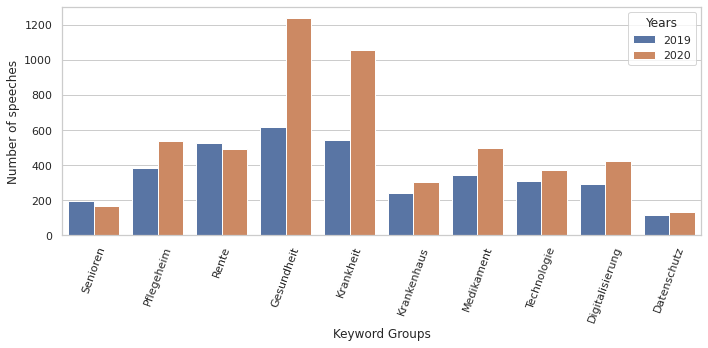

In [27]:
plt.figure(figsize=(10, 5))
bar = sns.barplot(data=keywords_count, y='Count', x='Keyword', hue='Years')
plt.xticks(rotation=70)
plt.tight_layout()
plt.ylabel('Number of speeches')
plt.xlabel('Keyword Groups')
plt.savefig('images/keywords.eps', bbox_inches='tight')